# Ejemplo con datos reales

In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Contiene 3 tipos de delito cada 100.000 habitantes para cada uno de los 50 estados en 1973, tambien incluye porcentaje de poblacion en area urbana

In [38]:
df = pd.read_csv("data/USArrests.csv").drop(columns=["rownames"])
df.head(8)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8


In [39]:
df.shape

(50, 4)

Las escalas no son las mismas -> estandarizar

In [40]:
# _, ax = plt.subplots(2, 3, figsize=(16, 8))
# ax = ax.flatten()
# k = 0
# for i, row in enumerate(df.columns):
#     for col in df.columns[i+1:]:
#         print(row, col)
#         # ax[k].set_title(f"{col} vs {row}")
#         sns.scatterplot(df, x=row, y=col, ax=ax[k])
        
#         k += 1

In [41]:
df_scaled = (df - df.mean()) / df.std()
pd.DataFrame([df_scaled.mean().round(2), df_scaled.std().round(2)], index=["mean", "std"])

,Murder,Assault,UrbanPop,Rape
mean,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0


In [42]:
u, d, vt = np.linalg.svd(df_scaled, full_matrices=False)

In [43]:
scores = u @ np.diag(d)
scores.shape

(50, 4)

In [ ]:
((d**2) / (df_scaled.shape[0] - 1)).round(4)

array([2.4802, 0.9898, 0.3566, 0.1734])

In [ ]:
varianzas = pd.DataFrame(scores.var(axis=0, ddof=1), index=[f"PC_{i+1}" for i in range(len(d))], columns=["varianza scores"])
varianzas["varianza relativa %"] = (varianzas["varianza scores"] / varianzas["varianza scores"].sum()).round(4)
varianzas["varianza scores"] = (varianzas["varianza scores"]).round(4)
varianzas

,varianza scores,varianza relativa %
PC_1,2.4802,0.6201
PC_2,0.9898,0.2474
PC_3,0.3566,0.0891
PC_4,0.1734,0.0434


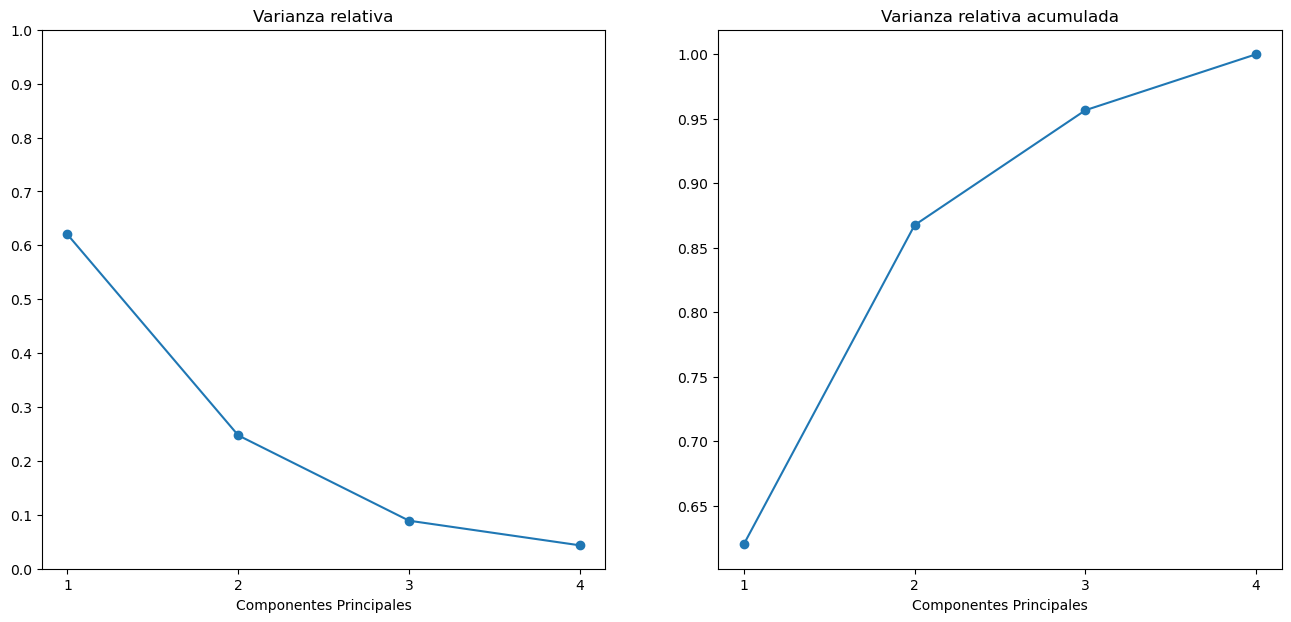

In [32]:
_, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].plot(np.arange(4)+1, varianzas["varianza relativa %"])
ax[0].scatter(np.arange(4)+1, varianzas["varianza relativa %"])
ax[0].set_ylim((0, 1))
ax[0].set_xticks(np.arange(4)+1)
ax[0].set_yticks(np.linspace(0, 1, 11))
ax[0].set_xlabel("Componentes Principales")
ax[0].set_title("Varianza relativa")

ax[1].plot(np.arange(4)+1, np.cumsum(varianzas["varianza relativa %"]));
ax[1].scatter(np.arange(4)+1, np.cumsum(varianzas["varianza relativa %"]));
ax[1].set_xticks(np.arange(4)+1)
ax[1].set_xlabel("Componentes Principales")
ax[1].set_title("Varianza relativa acumulada");

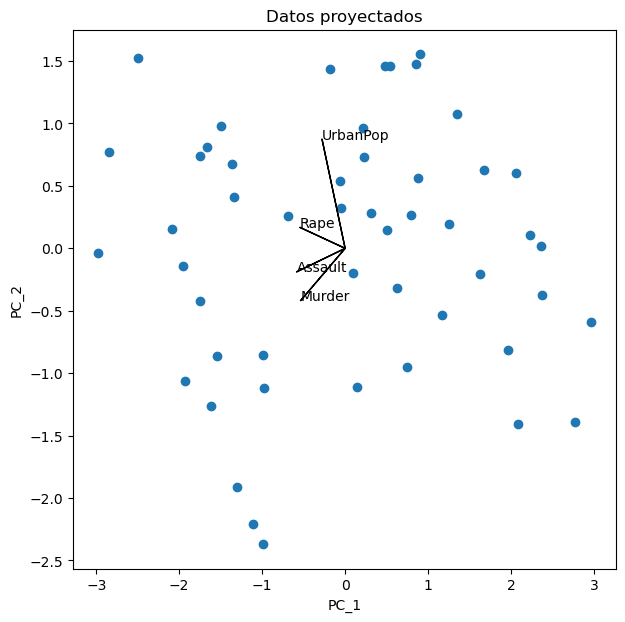

In [33]:
_, ax = plt.subplots(figsize=(7,7))

pc1, pc2 = 0, 1
ax.scatter(scores[:,pc1], scores[:,pc2]);

loadings = vt.T
for row in range(loadings.shape[1]):
    ax.arrow(0, 0, loadings[row, pc1], loadings[row, pc2])
    
    ax.text(loadings[row,pc1],
            loadings[row,pc2],
            df.columns[row])

ax.set_xlabel(f"PC_{pc1+1}")
ax.set_ylabel(f"PC_{pc2+1}")
ax.set_title("Datos proyectados");